# First look at one of our chosen data sets

In [85]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import io

### This is an online retail file. It seems to be full of random gifts.

In [56]:
#dfretail = pd.read_excel('Online Retail.xlsx')

In [ ]:
dfretail.info()

In [ ]:
nulls = dfretail.isnull().sum()
nulls

In [ ]:
dfret = dfretail['Description'].fillna('unclass')

In [ ]:
nulls = dfret.isnull().sum()
nulls

In [ ]:
dfret.head()

In [8]:
type(dfret)

pandas.core.series.Series

In [9]:
dfret.index

RangeIndex(start=0, stop=541909, step=1)

In [ ]:
for descript in dfret.index:
    dfretail[descript] = dfret[descript]
dfretail.head()

------------------------------------------------------------------
--------------------------------------------------------------
### Our RAM is having trouble with this first dataset. We are going to try a different dataset.
--------------------------------------------------------------
______________________________________________________________

# Looking into a more managable database

#### This is a grocery list that can be used for Market Basket Analysis, which gives insight in to the probability of items being purchased at the same time. 

In [57]:
df = pd.read_csv('Groceries_dataset.csv')
# df = pd.read_csv(io.StringIO(t), parse_dates=['Date'], index_col=0)
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


 **We can see that we don't need to clean up any null values. 
 <br>There are the same numer of entries in all three columns**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


 **This is confirmation that we don't have any null values**

In [59]:
nulls = df.isnull().sum()
nulls

Member_number      0
Date               0
itemDescription    0
dtype: int64

# We will look at each column to see the value counts
# Also, try grouping and visulizing columns


### Date

In [60]:
df['Date'].value_counts().head(20)

21-01-2015    96
21-07-2015    93
29-11-2015    92
08-08-2015    92
30-04-2015    91
28-08-2014    88
26-03-2015    88
30-09-2015    87
19-06-2015    85
16-05-2015    85
09-11-2015    83
20-08-2015    83
01-04-2015    83
21-08-2015    83
27-11-2015    82
26-02-2015    82
18-08-2015    82
15-08-2015    82
03-04-2014    82
11-10-2015    82
Name: Date, dtype: int64

**Here we want to change the order of the date column from DD-MM-YYYY to YYYY-MM-DD
<br>Not sure how to do this. Here are some exploratoty steps.**

In [61]:
for key, value in df.iteritems(): 
    print(key, value) 
    

Member_number 0        1808
1        2552
2        2300
3        1187
4        3037
         ... 
38760    4471
38761    2022
38762    1097
38763    1510
38764    1521
Name: Member_number, Length: 38765, dtype: int64
Date 0        21-07-2015
1        05-01-2015
2        19-09-2015
3        12-12-2015
4        01-02-2015
            ...    
38760    08-10-2014
38761    23-02-2014
38762    16-04-2014
38763    03-12-2014
38764    26-12-2014
Name: Date, Length: 38765, dtype: object
itemDescription 0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object


In [62]:
columns = list(df)
for i in columns: 
    print (df[i][1])

2552
05-01-2015
whole milk


**We have a solution here for the date!**

In [63]:
df['date'] = pd.to_datetime(df['Date'])
df

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014-08-10
38761,2022,23-02-2014,candy,2014-02-23
38762,1097,16-04-2014,cake bar,2014-04-16
38763,1510,03-12-2014,fruit/vegetable juice,2014-03-12


In [64]:
df = df.drop('Date',axis=1)

In [65]:
df

,Member_number,itemDescription,date
0,1808,tropical fruit,2015-07-21
1,2552,whole milk,2015-05-01
2,2300,pip fruit,2015-09-19
3,1187,other vegetables,2015-12-12
4,3037,whole milk,2015-01-02
...,...,...,...
38760,4471,sliced cheese,2014-08-10
38761,2022,candy,2014-02-23
38762,1097,cake bar,2014-04-16
38763,1510,fruit/vegetable juice,2014-03-12


In [66]:
df['date'].value_counts().head(20)

2015-01-21    96
2015-07-21    93
2015-11-29    92
2015-08-08    92
2015-04-30    91
2015-03-26    88
2014-08-28    88
2015-09-30    87
2015-06-19    85
2015-05-16    85
2015-08-20    83
2015-01-04    83
2015-08-21    83
2015-09-11    83
2015-08-15    82
2015-08-18    82
2015-11-27    82
2014-03-04    82
2015-02-26    82
2015-11-10    82
Name: date, dtype: int64

**Below we can see that the purchases cover a two year period 2014-2015 inclusive.**

In [67]:
print(df['date'].min(), df['date'].max())

2014-01-01 00:00:00 2015-12-30 00:00:00


In [68]:
# need to see if this is python datetime
df_date = df.groupby(["date"])
df_date.first()

,Member_number,itemDescription
date,,
2014-01-01,2351,cleaner
2014-01-02,2472,other vegetables
2014-01-03,3197,sausage
2014-01-04,1883,frankfurter
2014-01-05,2565,sausage
...,...,...
2015-12-26,4999,bottled water
2015-12-27,3006,chicken
2015-12-28,2447,onions


(array([16130., 16191., 16252., 16314., 16375., 16436., 16495., 16556.,
        16617., 16679., 16740.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

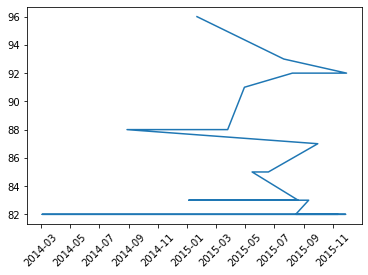

In [43]:
plt.plot(df["date"].value_counts().head(20))
plt.xticks(rotation=45)

,Member_number,itemDescription,date
0,1808,tropical fruit,2015-07-21
1,2552,whole milk,2015-05-01
2,2300,pip fruit,2015-09-19
3,1187,other vegetables,2015-12-12
4,3037,whole milk,2015-01-02
5,4941,rolls/buns,2015-02-14
6,4501,other vegetables,2015-08-05
7,3803,pot plants,2015-12-23
8,2762,whole milk,2015-03-20
9,4119,tropical fruit,2015-12-02


In [42]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')



NameError: name 'version' is not defined

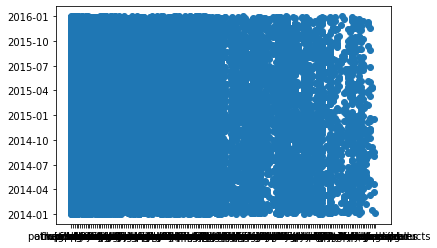

In [52]:
plt.plot(df.itemDescription, df.date, 'o')
plt.show()

In [48]:
df.date.iloc[2]

Timestamp('2015-09-19 00:00:00')

In [ ]:
df

### Member

In [22]:
df_member = df.groupby(["Member_number"])
df_member.first()

,itemDescription,date
Member_number,,
1000,soda,2015-05-27
1001,frankfurter,2015-01-20
1002,tropical fruit,2015-04-26
1003,sausage,2015-10-02
1004,other vegetables,2015-02-12
...,...,...
4996,dessert,2015-10-24
4997,tropical fruit,2015-12-27
4998,rolls/buns,2015-10-14


#### The high volume days maybe in preparation for certain holidays or public evens like sports or maybe simply weekends.

In [23]:
df['Member_number'].value_counts()

3180    36
3050    33
2051    33
3737    33
2433    31
        ..
4565     2
2373     2
3788     2
2614     2
2844     2
Name: Member_number, Length: 3898, dtype: int64

#### Member number 3180 is either too busy or doesn't leave the house. They've made 36 orders in a year. That is 3 times a month.  

(array([15.,  9.,  8.,  5.,  4.,  5.,  0.,  3.,  0.,  1.]),
 array([24. , 25.2, 26.4, 27.6, 28.8, 30. , 31.2, 32.4, 33.6, 34.8, 36. ]),
 <BarContainer object of 10 artists>)

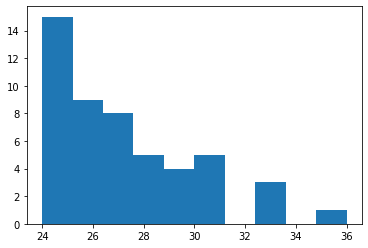

In [36]:
plt.hist(df["Member_number"].value_counts().head(50))

### Item

In [24]:
df['itemDescription'].value_counts().head(20)

whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
pork                   566
Name: itemDescription, dtype: int64

#### By far the most purcahsed item here is milk at 2500 units. But we might want to put other items in the same categories.
#### For example, all the fruits could be condensed into one fruit category

In [25]:
df_item = df.groupby(['itemDescription'])
df_item.first()

,Member_number,date
itemDescription,,
Instant food products,1746,2015-02-15
UHT-milk,2836,2015-12-29
abrasive cleaner,2421,2015-11-21
artif. sweetener,1273,2015-04-05
baby cosmetics,2070,2015-12-19
...,...,...
white bread,3950,2015-01-10
white wine,4389,2015-04-13
whole milk,2552,2015-05-01


(array([9., 4., 2., 1., 1., 1., 1., 0., 0., 1.]),
 array([ 566. ,  759.6,  953.2, 1146.8, 1340.4, 1534. , 1727.6, 1921.2,
        2114.8, 2308.4, 2502. ]),
 <BarContainer object of 10 artists>)

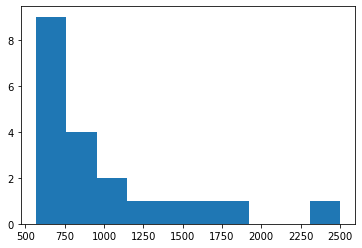

In [33]:
plt.hist(df["itemDescription"].value_counts().head(20))

# Now lets group by two columns

In [26]:
df_mem_date = df.groupby(['Member_number', 'date']) 
df_mem_date.first()

itemDescription
Member_number date                             
1000          2014-06-24             whole milk
              2015-03-15                sausage
              2015-05-27                   soda
              2015-07-24            canned beer
              2015-11-25                sausage
...                                         ...
4999          2015-05-16            butter milk
              2015-12-26          bottled water
5000          2014-09-03  fruit/vegetable juice
              2014-11-16           bottled beer
              2015-10-02                   soda

[14963 rows x 1 columns]

In [27]:
df_mem_item = df.groupby(['Member_number', 'itemDescription']) 
df_mem_item.first()

date
Member_number itemDescription               
1000          canned beer         2015-07-24
              hygiene articles    2015-11-25
              misc. beverages     2015-07-24
              pastry              2014-06-24
              pickled vegetables  2015-05-27
...                                      ...
5000          onions              2014-09-03
              other vegetables    2014-11-16
              root vegetables     2015-10-02
              semi-finished bread 2015-10-02
              soda                2015-10-02

[34766 rows x 1 columns]

In [28]:
df_dat_item = df.groupby(['date', 'itemDescription'])
df_dat_item.first()

Member_number
date       itemDescription                     
2014-01-01 Instant food products           2237
           berries                         2974
           bottled beer                    2610
           bottled water                   2237
           brown bread                     4260
...                                         ...
2015-12-30 tropical fruit                  2997
           turkey                          2970
           whipped/sour cream              2810
           whole milk                      1769
           yogurt                          2790

[25231 rows x 1 columns]

In [29]:
df_dat_mem = df.groupby(['date', 'Member_number'])
df_dat_mem.first()

itemDescription
date       Member_number                     
2014-01-01 1249                  citrus fruit
           1381                          curd
           1440              other vegetables
           1659           specialty chocolate
           1789                hamburger meat
...                                       ...
2015-12-30 3738                        onions
           3971                   brown bread
           4058                 domestic eggs
           4565                   canned beer
           4863                       dessert

[14963 rows x 1 columns]

In [30]:
df_item_dat = df.groupby(['itemDescription', 'date'])
df_item_dat.first()

Member_number
itemDescription       date                     
Instant food products 2014-01-01           2237
                      2014-01-19           2573
                      2014-01-25           2718
                      2014-01-31           4616
                      2014-02-03           4796
...                                         ...
zwieback              2015-11-13           4836
                      2015-11-29           1901
                      2015-12-03           2875
                      2015-12-04           2436
                      2015-12-15           3050

[25231 rows x 1 columns]

In [31]:
df_item_mem = df.groupby(['itemDescription', 'Member_number'])
df_item_mem.first()

date
itemDescription       Member_number           
Instant food products 1038          2015-12-14
                      1045          2014-10-04
                      1061          2015-05-09
                      1092          2015-07-27
                      1298          2015-07-27
...                                        ...
zwieback              4765          2015-05-07
                      4809          2015-04-13
                      4828          2014-10-28
                      4836          2015-11-13
                      4879          2014-09-19

[34766 rows x 1 columns]

(array([9., 4., 2., 1., 1., 1., 1., 0., 0., 1.]),
 array([ 566. ,  759.6,  953.2, 1146.8, 1340.4, 1534. , 1727.6, 1921.2,
        2114.8, 2308.4, 2502. ]),
 <BarContainer object of 10 artists>)

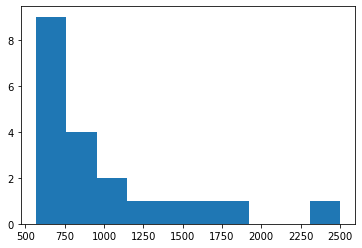

In [32]:
plt.hist(df["itemDescription"].value_counts().head(20))

In [74]:
print(df.itemDescription)
type(df.itemDescription)

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object


pandas.core.series.Series

In [79]:
df.itemDescription.value_counts()
for cn,val in df.itemDescription.value_counts():
    print(val)

TypeError: cannot unpack non-iterable int object

In [81]:
for item in df.itemDescription:
    print(item)

tropical fruit
whole milk
pip fruit
other vegetables
whole milk
rolls/buns
other vegetables
pot plants
whole milk
tropical fruit
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
other vegetables
butter milk
whole milk
tropical fruit
tropical fruit
bottled water
yogurt
sausage
other vegetables
brown bread
yogurt
hamburger meat
root vegetables
pork
beef
pastry
fruit/vegetable juice
canned beer
root vegetables
citrus fruit
sausage
tropical fruit
berries
canned beer
butter milk
coffee
pastry
rolls/buns
misc. beverages
root vegetables
sausage
canned beer
ham
turkey
whole milk
whole milk
packaged fruit/vegetables
rolls/buns
ham
rolls/buns
other vegetables
sausage
sausage
frankfurter
rolls/buns
whole milk
curd cheese
red/blush wine
sausage
tropical fruit
red/blush wine
whole milk
frankfurter
whole milk
frozen potato products
other vegetables
citrus fruit
flour
sugar
frozen meals
chocolate
root vegetables
root vegetables
herbs

pip fruit
whole milk
dessert
other vegetables
pork
frankfurter
whole milk
frankfurter
whipped/sour cream
curd
other vegetables
ham
whole milk
whole milk
soda
margarine
pip fruit
other vegetables
whole milk
pork
sausage
curd
canned beer
napkins
chewing gum
ice cream
bottled water
liver loaf
citrus fruit
chicken
citrus fruit
bottled water
pip fruit
whole milk
hamburger meat
turkey
ham
citrus fruit
sausage
yogurt
butter
chicken
beverages
onions
bottled beer
butter
root vegetables
sausage
ham
soda
chicken
sausage
other vegetables
whole milk
root vegetables
chicken
tropical fruit
pork
tropical fruit
chicken
other vegetables
whipped/sour cream
whole milk
root vegetables
sausage
frozen vegetables
beef
root vegetables
rolls/buns
canned beer
sweet spreads
beef
frozen vegetables
bottled water
domestic eggs
ice cream
ice cream
butter
sausage
ham
citrus fruit
red/blush wine
butter
whole milk
hard cheese
hygiene articles
soups
pastry
onions
ice cream
herbs
citrus fruit
white bread
pip fruit
misc. b

processed cheese
rolls/buns
chicken
berries
frankfurter
whole milk
pip fruit
soda
soda
yogurt
pork
onions
liquor
onions
beef
rolls/buns
frankfurter
sausage
whole milk
pork
whole milk
bottled water
shopping bags
citrus fruit
meat
sausage
berries
canned beer
chicken
whole milk
rolls/buns
hamburger meat
citrus fruit
bottled beer
beef
yogurt
meat
pastry
other vegetables
tidbits
potato products
waffles
tropical fruit
whole milk
bottled beer
soda
meat
pip fruit
rolls/buns
frankfurter
soda
pip fruit
rolls/buns
onions
whole milk
pastry
ham
root vegetables
photo/film
bottled beer
dessert
beverages
chicken
whole milk
hard cheese
pork
soda
yogurt
citrus fruit
soda
frankfurter
ice cream
brown bread
sugar
other vegetables
newspapers
nuts/prunes
yogurt
root vegetables
chicken
other vegetables
fruit/vegetable juice
hamburger meat
hamburger meat
sausage
pastry
root vegetables
soda
UHT-milk
citrus fruit
sausage
condensed milk
frozen meals
dessert
beef
pip fruit
soda
canned beer
mayonnaise
sausage
pip f

bottled water
whole milk
bottled beer
yogurt
whole milk
sausage
other vegetables
tropical fruit
coffee
root vegetables
frankfurter
ham
pip fruit
yogurt
meat
soda
pork
whole milk
bottled beer
bottled water
specialty bar
berries
dessert
ham
pork
cat food
whole milk
margarine
whole milk
whole milk
other vegetables
domestic eggs
canned beer
sausage
butter milk
ham
whole milk
other vegetables
sausage
bottled beer
misc. beverages
brown bread
whipped/sour cream
tropical fruit
citrus fruit
pip fruit
waffles
tropical fruit
frankfurter
sausage
frankfurter
curd
meat
other vegetables
whole milk
domestic eggs
pip fruit
other vegetables
sausage
salty snack
margarine
whole milk
frankfurter
whole milk
whole milk
brown bread
oil
liquor (appetizer)
rolls/buns
bottled water
citrus fruit
citrus fruit
whole milk
frankfurter
soda
meat
sausage
sausage
chocolate
canned beer
bottled beer
liver loaf
pastry
beef
canned beer
newspapers
sausage
citrus fruit
canned beer
frankfurter
rolls/buns
canned beer
frankfurte

citrus fruit
canned vegetables
sausage
frankfurter
domestic eggs
sausage
spread cheese
other vegetables
misc. beverages
citrus fruit
beef
yogurt
sausage
chocolate
other vegetables
butter
tropical fruit
other vegetables
canned beer
chicken
sausage
curd
salty snack
other vegetables
citrus fruit
sausage
citrus fruit
tropical fruit
chicken
white wine
sausage
sausage
cat food
beef
frankfurter
frankfurter
tropical fruit
bottled water
whole milk
pet care
ham
pip fruit
bottled water
tropical fruit
citrus fruit
pork
citrus fruit
newspapers
curd
whole milk
sausage
UHT-milk
tropical fruit
yogurt
other vegetables
turkey
pastry
whipped/sour cream
misc. beverages
brown bread
ham
sausage
tropical fruit
citrus fruit
photo/film
sausage
pork
frankfurter
brown bread
pork
chocolate
frankfurter
whole milk
chicken
citrus fruit
hamburger meat
root vegetables
finished products
canned beer
whole milk
bottled water
turkey
turkey
meat
tropical fruit
detergent
liquor
citrus fruit
whole milk
frankfurter
frankfurte

root vegetables
sausage
chocolate
citrus fruit
chicken
whole milk
packaged fruit/vegetables
whole milk
beef
ham
newspapers
frankfurter
whole milk
sausage
domestic eggs
dishes
pork
tropical fruit
yogurt
hamburger meat
canned beer
pet care
beef
chicken
yogurt
sugar
newspapers
hard cheese
beef
beverages
beef
rolls/buns
whole milk
chicken
sausage
citrus fruit
red/blush wine
whole milk
pip fruit
turkey
frankfurter
canned beer
pastry
bottled water
whole milk
citrus fruit
whole milk
bottled beer
liquor
curd
other vegetables
nuts/prunes
other vegetables
UHT-milk
pork
sausage
beverages
pastry
root vegetables
root vegetables
beef
bathroom cleaner
yogurt
frankfurter
curd cheese
whole milk
grapes
bottled water
butter milk
sliced cheese
fruit/vegetable juice
female sanitary products
rolls/buns
canned beer
pip fruit
pip fruit
rolls/buns
beef
frozen fish
soda
canned beer
tropical fruit
packaged fruit/vegetables
rolls/buns
canned beer
butter
berries
root vegetables
meat
brown bread
citrus fruit
whole 

yogurt
napkins
root vegetables
bottled water
other vegetables
bottled water
pip fruit
napkins
tropical fruit
yogurt
sausage
yogurt
cream cheese 
pip fruit
pip fruit
hamburger meat
sugar
sausage
sausage
sausage
coffee
pip fruit
whole milk
onions
ham
soda
root vegetables
ham
sausage
semi-finished bread
other vegetables
cream cheese 
dessert
whole milk
frankfurter
liquor (appetizer)
curd
curd
other vegetables
pork
frozen meals
soda
sausage
other vegetables
pip fruit
tropical fruit
canned beer
root vegetables
sausage
bottled water
citrus fruit
whole milk
pastry
pip fruit
pork
citrus fruit
curd
UHT-milk
rolls/buns
whole milk
root vegetables
white bread
nuts/prunes
whole milk
soda
hygiene articles
other vegetables
citrus fruit
sausage
bottled beer
pork
other vegetables
berries
citrus fruit
sausage
citrus fruit
root vegetables
bottled beer
coffee
citrus fruit
tropical fruit
frankfurter
white wine
other vegetables
sparkling wine
frankfurter
whipped/sour cream
salty snack
whole milk
sausage
des

baking powder
napkins
fruit/vegetable juice
pastry
yogurt
pip fruit
whole milk
soda
beverages
fruit/vegetable juice
yogurt
whole milk
other vegetables
pip fruit
bottled water
root vegetables
yogurt
hard cheese
hamburger meat
brown bread
onions
frozen potato products
chicken
salty snack
ham
fruit/vegetable juice
tropical fruit
frozen meals
chocolate
white bread
oil
other vegetables
yogurt
dessert
butter milk
misc. beverages
herbs
packaged fruit/vegetables
tropical fruit
bottled beer
cream cheese 
whole milk
meat
chocolate
pet care
meat spreads
waffles
pastry
whole milk
yogurt
butter
sausage
other vegetables
sugar
other vegetables
rolls/buns
pip fruit
root vegetables
onions
misc. beverages
jam
domestic eggs
soda
whole milk
pork
beef
pot plants
other vegetables
sugar
waffles
bottled water
whole milk
dishes
misc. beverages
detergent
beef
butter
soda
ham
hamburger meat
yogurt
whole milk
UHT-milk
shopping bags
root vegetables
coffee
whole milk
soda
whole milk
female sanitary products
pip fru

onions
rice
ham
instant coffee
specialty bar
bottled water
dessert
root vegetables
soft cheese
meat
whipped/sour cream
frozen potato products
frozen potato products
citrus fruit
specialty chocolate
UHT-milk
canned beer
other vegetables
margarine
chocolate
pastry
berries
turkey
soda
syrup
whole milk
pip fruit
pet care
whole milk
pastry
grapes
misc. beverages
root vegetables
whipped/sour cream
root vegetables
bottled beer
citrus fruit
pip fruit
pip fruit
root vegetables
tropical fruit
specialty bar
bottled water
rolls/buns
tropical fruit
other vegetables
pickled vegetables
specialty bar
finished products
other vegetables
rolls/buns
misc. beverages
other vegetables
whole milk
sugar
napkins
meat
pork
fruit/vegetable juice
sausage
canned beer
root vegetables
fruit/vegetable juice
sweet spreads
packaged fruit/vegetables
root vegetables
misc. beverages
other vegetables
white bread
UHT-milk
liquor
soda
tropical fruit
white wine
bottled water
frozen vegetables
beef
yogurt
salty snack
hamburger 

semi-finished bread
whole milk
hamburger meat
seasonal products
salty snack
dessert
tropical fruit
rolls/buns
butter milk
ice cream
white bread
curd
instant coffee
bottled beer
yogurt
other vegetables
other vegetables
soda
pip fruit
ham
dessert
root vegetables
other vegetables
fruit/vegetable juice
tea
pork
cream cheese 
rolls/buns
coffee
dishes
tropical fruit
meat spreads
yogurt
specialty chocolate
margarine
whole milk
frozen meals
other vegetables
soda
root vegetables
other vegetables
hard cheese
whole milk
soda
yogurt
pork
pip fruit
canned beer
whole milk
tropical fruit
frozen vegetables
root vegetables
newspapers
whipped/sour cream
processed cheese
flower (seeds)
cat food
processed cheese
tropical fruit
other vegetables
whole milk
chicken
pip fruit
yogurt
waffles
specialty chocolate
tropical fruit
other vegetables
rolls/buns
mustard
brown bread
brown bread
whole milk
root vegetables
rolls/buns
cream cheese 
beef
onions
onions
spread cheese
sugar
cat food
meat
specialty bar
rolls/bu

beverages
pip fruit
liquor
bottled water
rolls/buns
citrus fruit
rolls/buns
frozen vegetables
beef
other vegetables
other vegetables
other vegetables
whole milk
grapes
tropical fruit
other vegetables
tropical fruit
canned fish
pastry
dishes
rolls/buns
rolls/buns
tropical fruit
canned beer
berries
root vegetables
sliced cheese
oil
female sanitary products
root vegetables
rolls/buns
rolls/buns
tropical fruit
salty snack
canned fish
beverages
white wine
pip fruit
beef
instant coffee
curd
butter
other vegetables
yogurt
beef
newspapers
other vegetables
specialty chocolate
artif. sweetener
whole milk
UHT-milk
ice cream
onions
whole milk
whole milk
newspapers
bottled water
Instant food products
turkey
sausage
other vegetables
berries
root vegetables
red/blush wine
spread cheese
red/blush wine
whole milk
berries
other vegetables
semi-finished bread
canned beer
brown bread
snack products
tropical fruit
whole milk
rolls/buns
coffee
waffles
butter milk
newspapers
soda
domestic eggs
root vegetable

whole milk
pork
tropical fruit
pasta
other vegetables
pip fruit
yogurt
hamburger meat
citrus fruit
pork
newspapers
dessert
bottled water
root vegetables
dessert
bottled water
whole milk
other vegetables
beverages
photo/film
pork
beef
other vegetables
citrus fruit
whole milk
root vegetables
whole milk
whipped/sour cream
whole milk
whole milk
whole milk
hamburger meat
tropical fruit
abrasive cleaner
rolls/buns
whole milk
root vegetables
other vegetables
pickled vegetables
chicken
other vegetables
root vegetables
curd
yogurt
whole milk
meat
other vegetables
citrus fruit
root vegetables
onions
bottled beer
pip fruit
herbs
other vegetables
soda
specialty chocolate
fruit/vegetable juice
pork
root vegetables
red/blush wine
coffee
white bread
citrus fruit
other vegetables
long life bakery product
whole milk
pip fruit
herbs
sausage
cream cheese 
other vegetables
whole milk
rolls/buns
other vegetables
white wine
tropical fruit
other vegetables
root vegetables
whipped/sour cream
pork
meat
whole m

semi-finished bread
soft cheese
frozen vegetables
whole milk
packaged fruit/vegetables
instant coffee
white bread
pastry
grapes
whole milk
other vegetables
shopping bags
coffee
fruit/vegetable juice
pastry
specialty fat
tropical fruit
sliced cheese
pudding powder
soda
brown bread
long life bakery product
other vegetables
domestic eggs
citrus fruit
spices
rolls/buns
whole milk
detergent
curd
bottled beer
brown bread
cling film/bags
grapes
shopping bags
whole milk
pip fruit
other vegetables
butter
bottled water
shopping bags
roll products 
bottled beer
chocolate
jam
red/blush wine
brown bread
soda
berries
rolls/buns
whole milk
butter milk
soups
bottled beer
whole milk
whole milk
newspapers
yogurt
rolls/buns
margarine
waffles
whole milk
citrus fruit
rolls/buns
margarine
shopping bags
waffles
bottled water
pot plants
tropical fruit
UHT-milk
whole milk
frozen potato products
rolls/buns
other vegetables
tropical fruit
roll products 
ice cream
sweet spreads
domestic eggs
oil
rolls/buns
pastry

whole milk
shopping bags
pork
turkey
whole milk
turkey
curd
cream cheese 
frozen fish
other vegetables
yogurt
yogurt
root vegetables
whole milk
rolls/buns
whole milk
yogurt
long life bakery product
tropical fruit
curd
flour
curd
other vegetables
semi-finished bread
butter
coffee
onions
rolls/buns
curd
herbs
other vegetables
frozen meals
oil
frozen vegetables
herbs
yogurt
rolls/buns
bottled beer
cream
yogurt
citrus fruit
yogurt
whole milk
other vegetables
coffee
tropical fruit
sliced cheese
rolls/buns
rolls/buns
frozen dessert
pork
fruit/vegetable juice
spices
other vegetables
whole milk
seasonal products
domestic eggs
margarine
citrus fruit
UHT-milk
curd
onions
margarine
whipped/sour cream
soda
citrus fruit
soda
butter
soda
napkins
other vegetables
root vegetables
onions
white wine
onions
brown bread
rolls/buns
instant coffee
pot plants
yogurt
whole milk
butter
root vegetables
newspapers
tropical fruit
bottled beer
UHT-milk
shopping bags
whole milk
soups
bottled water
root vegetables
p

yogurt
photo/film
seasonal products
fruit/vegetable juice
bottled water
ice cream
domestic eggs
napkins
shopping bags
specialty bar
rolls/buns
specialty cheese
bottled water
yogurt
bottled beer
white bread
waffles
nut snack
root vegetables
soda
soda
chocolate
rolls/buns
whipped/sour cream
bottled beer
bottled water
beverages
bottled beer
pot plants
tropical fruit
pet care
curd
root vegetables
UHT-milk
root vegetables
frozen vegetables
pastry
rolls/buns
whole milk
salty snack
canned beer
rolls/buns
soda
grapes
grapes
bottled beer
napkins
packaged fruit/vegetables
whole milk
root vegetables
frozen vegetables
tropical fruit
soups
curd
tropical fruit
UHT-milk
butter
butter milk
soups
chocolate
newspapers
frozen dessert
tropical fruit
whole milk
pastry
pip fruit
packaged fruit/vegetables
whole milk
candy
pastry
rolls/buns
rolls/buns
dessert
pork
soda
other vegetables
yogurt
liquor
whole milk
soda
shopping bags
white wine
butter
berries
whole milk
newspapers
soda
yogurt
citrus fruit
yogurt
y

whipped/sour cream
flour
newspapers
waffles
flour
jam
domestic eggs
salty snack
hamburger meat
hair spray
grapes
soda
soda
shopping bags
root vegetables
dessert
whole milk
other vegetables
yogurt
cream cheese 
whole milk
hamburger meat
soda
beef
frozen vegetables
hamburger meat
fruit/vegetable juice
pork
soda
frozen fruits
berries
berries
soda
dessert
napkins
berries
bottled beer
frozen dessert
berries
packaged fruit/vegetables
finished products
chicken
rum
tropical fruit
bottled water
root vegetables
newspapers
red/blush wine
specialty chocolate
berries
pip fruit
chicken
frozen meals
pork
pork
other vegetables
pip fruit
white wine
tropical fruit
rolls/buns
chocolate marshmallow
other vegetables
coffee
beef
soda
root vegetables
pastry
white bread
pastry
hamburger meat
domestic eggs
curd
whole milk
other vegetables
sliced cheese
canned vegetables
grapes
canned beer
tropical fruit
citrus fruit
pip fruit
canned beer
shopping bags
white bread
chewing gum
pastry
whole milk
frozen vegetables

margarine
yogurt
brown bread
bottled water
processed cheese
whole milk
specialty bar
soda
pet care
cream cheese 
dessert
butter
spread cheese
newspapers
bottled water
canned beer
pastry
soda
liquor
butter
whole milk
salad dressing
pastry
other vegetables
pip fruit
yogurt
bottled beer
other vegetables
yogurt
baking powder
candles
chocolate
dog food
mayonnaise
red/blush wine
candy
fruit/vegetable juice
frozen vegetables
onions
pastry
pot plants
soda
canned beer
white bread
candy
bottled beer
curd
yogurt
frozen vegetables
canned beer
other vegetables
dishes
potato products
bottled beer
shopping bags
spices
canned fish
pip fruit
popcorn
candy
other vegetables
red/blush wine
margarine
soda
flour
whole milk
bottled water
frozen vegetables
butter milk
rolls/buns
curd
pastry
frozen vegetables
whipped/sour cream
frozen meals
salt
pastry
fruit/vegetable juice
soups
canned vegetables
canned beer
red/blush wine
curd
curd
soda
brown bread
whole milk
butter
canned beer
root vegetables
sweet spreads


semi-finished bread
UHT-milk
specialty cheese
whipped/sour cream
onions
dessert
fruit/vegetable juice
soda
whole milk
domestic eggs
domestic eggs
whole milk
bottled beer
cream cheese 
chewing gum
seasonal products
tidbits
roll products 
other vegetables
waffles
bottled water
butter
semi-finished bread
root vegetables
syrup
rolls/buns
margarine
whole milk
bottled beer
cake bar
frozen potato products
shopping bags
condensed milk
hard cheese
cream cheese 
specialty vegetables
shopping bags
white wine
dog food
whole milk
mayonnaise
fruit/vegetable juice
bottled water
brown bread
chewing gum
brown bread
cat food
soda
rolls/buns
white bread
chewing gum
sweet spreads
shopping bags
red/blush wine
dessert
soda
bottled water
onions
frozen vegetables
frozen meals
red/blush wine
oil
soda
other vegetables
candy
rolls/buns
other vegetables
soda
ice cream
pasta
dishes
shopping bags
rolls/buns
curd
pip fruit
sliced cheese
whole milk
baking powder
napkins
specialty fat
dental care
margarine
domestic eg

beverages
rolls/buns
chocolate
soups
shopping bags
misc. beverages
pastry
specialty bar
red/blush wine
rolls/buns
butter
margarine
shopping bags
pastry
rolls/buns
processed cheese
flour
butter milk
frozen dessert
frozen potato products
root vegetables
chocolate
pastry
newspapers
margarine
yogurt
whipped/sour cream
pip fruit
waffles
rolls/buns
canned beer
pastry
spread cheese
yogurt
red/blush wine
mayonnaise
sliced cheese
other vegetables
soda
white bread
citrus fruit
soda
soda
newspapers
shopping bags
coffee
seasonal products
specialty bar
shopping bags
whipped/sour cream
whole milk
pastry
rolls/buns
pip fruit
cling film/bags
root vegetables
specialty bar
bottled water
fruit/vegetable juice
grapes
newspapers
canned fish
candy
canned vegetables
rolls/buns
yogurt
root vegetables
UHT-milk
other vegetables
baking powder
rolls/buns
soft cheese
misc. beverages
other vegetables
waffles
bottled water
white wine
ice cream
yogurt
yogurt
cling film/bags
specialty chocolate
other vegetables
specia

photo/film
soda
rolls/buns
newspapers
newspapers
domestic eggs
other vegetables
cooking chocolate
brown bread
softener
yogurt
condensed milk
brown bread
chocolate
newspapers
bottled beer
bottled water
berries
shopping bags
yogurt
waffles
hygiene articles
long life bakery product
yogurt
hygiene articles
domestic eggs
whipped/sour cream
bottled water
yogurt
newspapers
pasta
frozen vegetables
bottled water
bottled water
dish cleaner
pot plants
bottled beer
tea
shopping bags
newspapers
cream cheese 
yogurt
yogurt
UHT-milk
shopping bags
other vegetables
shopping bags
butter milk
rolls/buns
newspapers
liquor
pot plants
other vegetables
dessert
flower (seeds)
pot plants
instant coffee
specialty bar
coffee
spread cheese
rolls/buns
other vegetables
pasta
pasta
soft cheese
soda
margarine
tropical fruit
root vegetables
other vegetables
spread cheese
pastry
whole milk
margarine
whole milk
other vegetables
pastry
flour
chewing gum
detergent
tropical fruit
waffles
soda
flour
yogurt
bottled beer
yogu

packaged fruit/vegetables
whole milk
light bulbs
butter milk
whipped/sour cream
bottled water
soft cheese
soda
fruit/vegetable juice
soft cheese
brown bread
house keeping products
semi-finished bread
butter
newspapers
ice cream
shopping bags
frozen vegetables
coffee
other vegetables
curd
waffles
whipped/sour cream
pastry
bottled beer
chocolate
margarine
rolls/buns
other vegetables
make up remover
liquor
pip fruit
whole milk
yogurt
yogurt
pastry
yogurt
curd cheese
bottled beer
UHT-milk
salt
other vegetables
seasonal products
soda
soda
female sanitary products
frozen vegetables
misc. beverages
coffee
frozen fish
specialty cheese
domestic eggs
soft cheese
napkins
soft cheese
whole milk
coffee
bottled water
hygiene articles
liquor
whole milk
roll products 
specialty fat
curd
whole milk
pasta
pickled vegetables
margarine
whipped/sour cream
waffles
shopping bags
curd
root vegetables
rolls/buns
specialty chocolate
mustard
pastry
other vegetables
butter milk
photo/film
sliced cheese
frozen veg

whole milk
soda
misc. beverages
white bread
whipped/sour cream
yogurt
pastry
pastry
brown bread
rolls/buns
whole milk
processed cheese
margarine
rice
beverages
chewing gum
pasta
rolls/buns
chocolate
shopping bags
UHT-milk
cream cheese 
mustard
other vegetables
roll products 
liquor
specialty bar
rolls/buns
butter milk
waffles
curd
cat food
flour
yogurt
potato products
domestic eggs
dessert
pastry
candy
flower (seeds)
yogurt
hygiene articles
frozen vegetables
oil
margarine
butter
sliced cheese
condensed milk
UHT-milk
pasta
domestic eggs
fruit/vegetable juice
pastry
soft cheese
whipped/sour cream
shopping bags
salty snack
salt
sliced cheese
pastry
rolls/buns
rolls/buns
coffee
waffles
soda
canned beer
rolls/buns
whole milk
onions
margarine
napkins
butter milk
newspapers
dishes
brown bread
rolls/buns
sliced cheese
dessert
chocolate
frozen dessert
frozen meals
bottled water
butter milk
rolls/buns
flour
whole milk
other vegetables
sugar
frozen meals
soda
ketchup
citrus fruit
yogurt
shopping 

soda
whipped/sour cream
sauces
bottled water
bottled water
soft cheese
butter milk
candy
flour
soda
pot plants
newspapers
ready soups
pastry
yogurt
shopping bags
chocolate
yogurt
dessert
whipped/sour cream
whipped/sour cream
whipped/sour cream
frozen fish
detergent
hard cheese
pasta
whole milk
candles
shopping bags
hygiene articles
roll products 
soda
candy
soda
detergent
frozen vegetables
processed cheese
butter
bottled water
waffles
pot plants
shopping bags
UHT-milk
soda
instant coffee
rolls/buns
whipped/sour cream
ketchup
specialty fat
preservation products
chewing gum
butter milk
other vegetables
fruit/vegetable juice
candy
oil
whipped/sour cream
UHT-milk
rolls/buns
long life bakery product
whole milk
onions
mustard
curd
pastry
chocolate
whole milk
rum
fruit/vegetable juice
hard cheese
soda
ketchup
white bread
root vegetables
other vegetables
condensed milk
sweet spreads
soda
waffles
whipped/sour cream
pot plants
softener
whole milk
bottled water
whipped/sour cream
pastry
cat food


chocolate
domestic eggs
cream cheese 
detergent
butter
margarine
baking powder
rolls/buns
cream
pot plants
butter milk
curd
salty snack
cat food
newspapers
dishes
domestic eggs
yogurt
candy
fruit/vegetable juice
frozen vegetables
whole milk
white bread
beverages
misc. beverages
rolls/buns
long life bakery product
pastry
pickled vegetables
sauces
sugar
hard cheese
domestic eggs
brown bread
curd
shopping bags
margarine
liquor (appetizer)
yogurt
soups
shopping bags
soda
butter
rolls/buns
specialty chocolate
instant coffee
domestic eggs
whole milk
waffles
salty snack
newspapers
sugar
salty snack
flower (seeds)
yogurt
pastry
domestic eggs
oil
canned beer
syrup
canned beer
flour
white bread
flour
softener
rolls/buns
whipped/sour cream
margarine
sugar
frozen fish
citrus fruit
white bread
soda
butter
cat food
pastry
soda
whole milk
shopping bags
frozen vegetables
dog food
dessert
flower (seeds)
male cosmetics
margarine
baking powder
processed cheese
onions
white bread
sugar
softener
rolls/buns

coffee
white bread
rolls/buns
canned beer
white wine
sauces
hygiene articles
newspapers
fruit/vegetable juice
napkins
bottled beer
pastry
newspapers
meat spreads
sugar
coffee
domestic eggs
salt
rolls/buns
whole milk
baking powder
salty snack
coffee
newspapers
ketchup
newspapers
waffles
popcorn
cleaner
shopping bags
napkins
chocolate
shopping bags
specialty cheese
shopping bags
newspapers
specialty bar
fruit/vegetable juice
oil
liqueur
dishes
sugar
brown bread
zwieback
flour
margarine
frozen vegetables
rolls/buns
soda
shopping bags
soda
whipped/sour cream
cat food
pastry
root vegetables
whipped/sour cream
chocolate
rolls/buns
whole milk
salty snack
white bread
shopping bags
bottled beer
bottled beer
cake bar
coffee
hard cheese
soft cheese
whole milk
yogurt
rolls/buns
shopping bags
domestic eggs
coffee
flour
newspapers
shopping bags
shopping bags
bathroom cleaner
napkins
whipped/sour cream
dessert
soft cheese
shopping bags
detergent
chocolate
sugar
canned fish
hard cheese
bottled beer
bu

butter
bottled beer
pasta
yogurt
hygiene articles
pet care
misc. beverages
curd
rice
flour
shopping bags
rum
whipped/sour cream
skin care
margarine
chocolate
margarine
domestic eggs
waffles
bottled beer
long life bakery product
white bread
sparkling wine
flour
white bread
roll products 
domestic eggs
bottled beer
yogurt
tea
fruit/vegetable juice
seasonal products
coffee
margarine
white bread
candy
specialty cheese
butter
soups
margarine
bottled beer
shopping bags
frozen potato products
waffles
cake bar
soft cheese
newspapers
napkins
candy
baking powder
flour
margarine
coffee
syrup
rolls/buns
roll products 
brown bread
bottled water
candy
soda
fruit/vegetable juice
shopping bags
shopping bags
abrasive cleaner
white bread
fruit/vegetable juice
ketchup
canned fish
pet care
shopping bags
chewing gum
brown bread
canned beer
flour
candy
white wine
hygiene articles
bottled beer
hygiene articles
frozen fish
white bread
cream cheese 
specialty chocolate
frozen meals
napkins
soda
long life baker

In [86]:
requests.get("https://groceries.morrisons.com/browse")

<Response [200]>